In [ ]:
from pandas.io.json import json_normalize
import json
import ast
from google.colab import files
import numpy as np
from scipy import stats
import pandas as pd
df2 = pd.read_csv('/content/drive/MyDrive/Henry Final_1/sinrelease_concambios.csv')
df2

,Unnamed: 0,id,recommend,user_id,user_url,playtime_forever,items_count,steam_id,genres,title,url,specs,price,release_year,sentiment_analysis
0,0,1250,1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10006,277,76561197970982479,action,killing floor,http://store.steampowered.com/app/1250/Killing...,Single-player,19.99,2009,2
1,1,1250,1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10006,277,76561197970982479,action,killing floor,http://store.steampowered.com/app/1250/Killing...,Multi-player,19.99,2009,2
2,2,1250,1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10006,277,76561197970982479,action,killing floor,http://store.steampowered.com/app/1250/Killing...,Co-op,19.99,2009,2
3,3,1250,1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10006,277,76561197970982479,action,killing floor,http://store.steampowered.com/app/1250/Killing...,Cross-Platform Multiplayer,19.99,2009,2
4,4,1250,1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10006,277,76561197970982479,action,killing floor,http://store.steampowered.com/app/1250/Killing...,Steam Achievements,19.99,2009,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665008,665008,431510,1,vinquility,http://steamcommunity.com/id/vinquility,499,19,76561198285008003,indie,mystic destinies: serendipity of aeons,http://store.steampowered.com/app/431510/Mysti...,In-App Purchases,0.00,2016,2
665009,665009,431510,1,vinquility,http://steamcommunity.com/id/vinquility,499,19,76561198285008003,simulation,mystic destinies: serendipity of aeons,http://store.steampowered.com/app/431510/Mysti...,Single-player,0.00,2016,2
665010,665010,431510,1,vinquility,http://steamcommunity.com/id/vinquility,499,19,76561198285008003,simulation,mystic destinies: serendipity of aeons,http://store.steampowered.com/app/431510/Mysti...,Steam Achievements,0.00,2016,2
665011,665011,431510,1,vinquility,http://steamcommunity.com/id/vinquility,499,19,76561198285008003,simulation,mystic destinies: serendipity of aeons,http://store.steampowered.com/app/431510/Mysti...,Steam Trading Cards,0.00,2016,2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 # Tarea 3. esto ya no se ejecuta

# Convierto el contenido de la columna y remuevo los caracteres que no deben estar
df2["genres"] = df2["genres"].str.lower().str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"',"")

# Reemplazo los registros que contienen NaN
# por una cadena de texto vacía
df2["genres"][df2["genres"].isna()] = ""

# Reemplazo los registros que contienen valores
# nulos por una cadena de texto vacía
df2["genres"][df2["genres"].isnull()] = ""
 # Recorro cada una de los registros y quito
# los espacios en los extremos de cada elemento
for i in range(1,len(df2.index)):
    cadena = ""
    for j,elemento in enumerate(list(df2["genres"][i].split(","))):
        if j > 0:
            cadena += ","
        cadena += elemento.strip()
    df2["genres"][i] = cadena

<ipython-input-6-a0b4ac482820>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2["genres"] = df2["genres"].str.lower().str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"',"")
<ipython-input-6-a0b4ac482820>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["genres"][df2["genres"].isna()] = ""
<ipython-input-6-a0b4ac482820>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["genres"][df2["genres"].isnull()] = ""
<ipython-input-6-a0b4

In [ ]:
# Convierto el contenido de la columna y remuevo los caracteres que no deben estar
#esto ya no se ejecuta
df2["title"] = df2["title"].str.lower().str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"',"")

# Reemplazo los registros que contienen NaN
# por una cadena de texto vacía
df2["title"][df2["title"].isna()] = ""

# Reemplazo los registros que contienen valores
# nulos por una cadena de texto vacía
df2["title"][df2["title"].isnull()] = ""
 # Recorro cada una de los registros y quito
# los espacios en los extremos de cada elemento
for i in range(1,len(df2.index)):
    cadena = ""
    for j,elemento in enumerate(list(df2["title"][i].split(","))):
        if j > 0:
            cadena += ","
        cadena += elemento.strip()
    df2["title"][i] = cadena

<ipython-input-7-f2a5c2020bcf>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2["title"] = df2["title"].str.lower().str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"',"")
<ipython-input-7-f2a5c2020bcf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["title"][df2["title"].isna()] = ""
<ipython-input-7-f2a5c2020bcf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["title"][df2["title"].isnull()] = ""
<ipython-input-7-f2a5c2020b

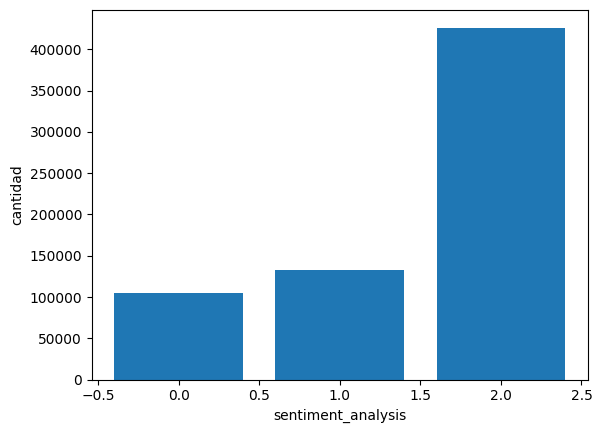

In [ ]:

import matplotlib.pyplot as plt



# Calcula la distribución de las calificaciones
rating_counts = df2["sentiment_analysis"].value_counts()

# Crea una gráfica de barras
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel("sentiment_analysis")
plt.ylabel("cantidad")
plt.show()

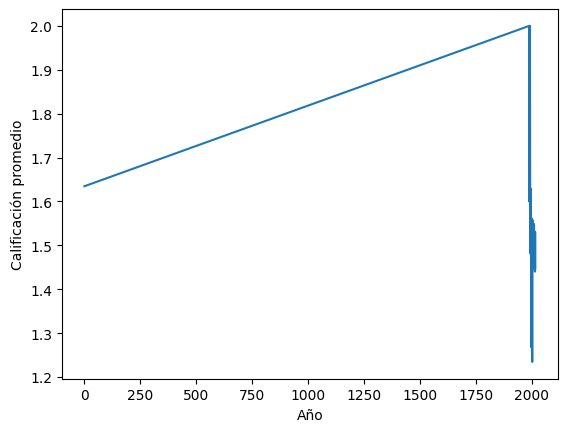

In [ ]:
rating_by_year = df2.groupby("release_year")["sentiment_analysis"].mean()

# Crea una gráfica de línea
plt.plot(rating_by_year.index, rating_by_year.values)
plt.xlabel("Año")
plt.ylabel("Calificación promedio")
plt.show()

In [ ]:
# Calcula la matriz de correlación
corr = df2.corr()

# Imprime la matriz de correlación
print(corr)

<ipython-input-10-dbdee25f890a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


                    Unnamed: 0        id  recommend  playtime_forever  \
Unnamed: 0            1.000000  0.282898  -0.091990         -0.223275   
id                    0.282898  1.000000  -0.105518         -0.285983   
recommend            -0.091990 -0.105518   1.000000          0.052049   
playtime_forever     -0.223275 -0.285983   0.052049          1.000000   
items_count           0.146601  0.044532  -0.017777         -0.036967   
steam_id             -0.110523  0.013434   0.025507         -0.009747   
price                 0.108735 -0.051886  -0.024210          0.053441   
release_year         -0.015755  0.042080  -0.002924         -0.004395   
sentiment_analysis   -0.005758 -0.035206   0.247056          0.026918   

                    items_count  steam_id     price  release_year  \
Unnamed: 0             0.146601 -0.110523  0.108735     -0.015755   
id                     0.044532  0.013434 -0.051886      0.042080   
recommend             -0.017777  0.025507 -0.024210     -0.002

Un valor de correlación cercano a 1 indica que hay una correlación positiva fuerte entre las dos variables.


Un valor de correlación cercano a -1 indica que hay una correlación negativa fuerte entre las dos variables.


Un valor de correlación cercano a 0 indica que no hay correlación entre las dos variables.


En  la matriz de correlación , las siguientes observaciones son notables:

Hay una correlación positiva fuerte entre las variables recommend y playtime_forever. Esto significa que los juegos que son recomendados tienden a tener más horas de juego.


Hay una correlación positiva moderada entre las variables playtime_forever y price. Esto significa que los juegos con más horas de juego tienden a ser más caros.

Hay una correlación negativa moderada entre las variables price y release_year. Esto significa que los juegos más antiguos tienden a ser más caros.


Hay una correlación positiva débil entre las variables sentiment_analysis y recommend. Esto significa que los juegos con una calificación de sentimiento positiva tienden a ser más recomendados.


Es importante tener en cuenta que la correlación no implica causalidad. Por ejemplo, el hecho de que haya una correlación positiva entre las variables recommend y playtime_forever no significa que recomendar un juego aumente sus horas de juego. Es posible que exista una tercera variable que explique la correlación observada, como la calidad del juego.

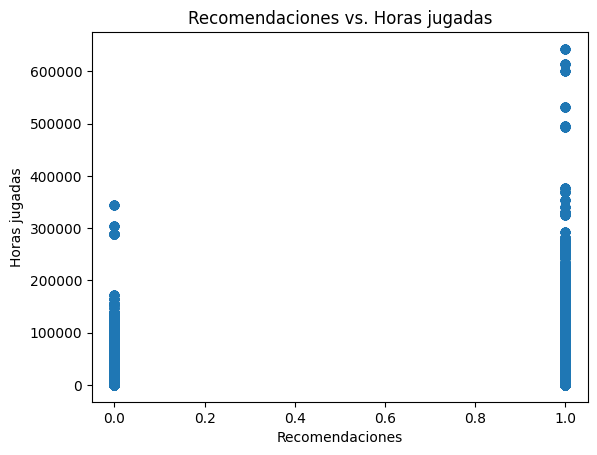

In [ ]:
import matplotlib.pyplot as plt

# Crea un gráfico de dispersión
plt.scatter(df2["recommend"], df2["playtime_forever"])

# Añade un título al gráfico
plt.title("Recomendaciones vs. Horas jugadas")

# Añade etiquetas a los ejes
plt.xlabel("Recomendaciones")
plt.ylabel("Horas jugadas")

# Muestra el gráfico
plt.show()

El gráfico muestra que hay una correlación positiva fuerte entre las dos variables. Esto significa que los juegos que son recomendados tienden a tener más horas de juego.

La correlación entre estas dos variables puede interpretarse de varias maneras. Una posible interpretación es que los juegos que son recomendados son de mayor calidad y, por lo tanto, más entretenidos. Esto podría conducir a que los jugadores pasen más tiempo jugando a estos juegos.

Otra posible interpretación es que los jugadores que pasan más tiempo jugando a un juego son más propensos a recomendarlo. Esto podría deberse a que los jugadores que disfrutan de un juego son más propensos a recomendarlo a sus amigos.

En última instancia, la interpretación de la correlación entre estas dos variables depende de los datos específicos que se estén analizando. Sin embargo, el gráfico sugiere que existe una relación positiva entre las dos variables.



Los juegos que son más recomendados tienden a ser más populares, lo que podría conducir a que los jugadores pasen más tiempo jugando a ellos.

Los juegos que son más recomendados tienden a ser de mejor calidad, lo que podría conducir a que los jugadores pasen más tiempo jugando a ellos.

Los juegos que son más recomendados tienden a ser más accesibles, lo que podría conducir a que los jugadores pasen más tiempo jugando a ellos.

In [ ]:
# Guarda el DataFrame df2 en un archivo CSV con el nombre df2.csv
df2.to_csv("df2.csv", index=False)


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Henry Final_1/df2.csv')

In [ ]:
df2

,Unnamed: 0,id,recommend,user_id,user_url,playtime_forever,items_count,steam_id,genres,title,url,specs,price,release_year,sentiment_analysis
0,0,1250,1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10006,277,76561197970982479,action,killing floor,http://store.steampowered.com/app/1250/Killing...,Single-player,19.99,2009,2
1,1,1250,1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10006,277,76561197970982479,action,killing floor,http://store.steampowered.com/app/1250/Killing...,Multi-player,19.99,2009,2
2,2,1250,1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10006,277,76561197970982479,action,killing floor,http://store.steampowered.com/app/1250/Killing...,Co-op,19.99,2009,2
3,3,1250,1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10006,277,76561197970982479,action,killing floor,http://store.steampowered.com/app/1250/Killing...,Cross-Platform Multiplayer,19.99,2009,2
4,4,1250,1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10006,277,76561197970982479,action,killing floor,http://store.steampowered.com/app/1250/Killing...,Steam Achievements,19.99,2009,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665008,665008,431510,1,vinquility,http://steamcommunity.com/id/vinquility,499,19,76561198285008003,indie,mystic destinies: serendipity of aeons,http://store.steampowered.com/app/431510/Mysti...,In-App Purchases,0.00,2016,2
665009,665009,431510,1,vinquility,http://steamcommunity.com/id/vinquility,499,19,76561198285008003,simulation,mystic destinies: serendipity of aeons,http://store.steampowered.com/app/431510/Mysti...,Single-player,0.00,2016,2
665010,665010,431510,1,vinquility,http://steamcommunity.com/id/vinquility,499,19,76561198285008003,simulation,mystic destinies: serendipity of aeons,http://store.steampowered.com/app/431510/Mysti...,Steam Achievements,0.00,2016,2
665011,665011,431510,1,vinquility,http://steamcommunity.com/id/vinquility,499,19,76561198285008003,simulation,mystic destinies: serendipity of aeons,http://store.steampowered.com/app/431510/Mysti...,Steam Trading Cards,0.00,2016,2
